In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [14]:
saratoga_temp_ppt=pd.read_csv('datasets/PRISM saratoga precip and mean temp since 1895 CSV.csv',delimiter=',')
saratoga_temp_ppt_df = pd.DataFrame(saratoga_temp_ppt)
saratoga_temp_ppt_df.columns = saratoga_temp_ppt_df.iloc[9]
saratoga_temp_ppt_df = saratoga_temp_ppt_df[10:]
saratoga_temp_ppt_df = saratoga_temp_ppt_df.reset_index(drop=True)
saratoga_temp_ppt_df.head()

9,Date,ppt (inches),tmean (degrees F)
0,1895,36.73,45.1
1,1896,40.62,45.1
2,1897,48.7,45.2
3,1898,46.68,47.1
4,1899,37.69,45.7


In [15]:
saratoga_temp_ppt_df['Date'] = pd.to_numeric(saratoga_temp_ppt_df['Date'])
saratoga_temp_ppt_df['ppt (inches)'] = pd.to_numeric(saratoga_temp_ppt_df['ppt (inches)'])
saratoga_temp_ppt_df['tmean (degrees F)'] = pd.to_numeric(saratoga_temp_ppt_df['tmean (degrees F)'])

In [16]:
saratoga_temp_ppt_2000=pd.read_csv('datasets/PRISM_ppt_tmean_Saratoga1993-2018CSV.csv',delimiter=',')
saratoga_temp_ppt_2000_df = pd.DataFrame(saratoga_temp_ppt_2000)
saratoga_temp_ppt_2000_df.columns = saratoga_temp_ppt_2000_df.iloc[9]
saratoga_temp_ppt_2000_df = saratoga_temp_ppt_2000_df[10:]
saratoga_temp_ppt_2000_df = saratoga_temp_ppt_2000_df.reset_index(drop=True)
saratoga_temp_ppt_2000_df.head()

9,Date,ppt (inches),tmean (degrees F)
0,1993-01,3.2,24.2
1,1993-02,3.21,14.8
2,1993-03,4.4,28.4
3,1993-04,6.09,45.5
4,1993-05,1.16,57.5


In [17]:
saratoga_temp_ppt_2000_df['ppt (inches)'] = pd.to_numeric(saratoga_temp_ppt_2000_df['ppt (inches)'])
saratoga_temp_ppt_2000_df['tmean (degrees F)'] = pd.to_numeric(saratoga_temp_ppt_2000_df['tmean (degrees F)'])

In [18]:
date_split = saratoga_temp_ppt_2000_df["Date"].str.split("-", n = 1, expand = True) 
saratoga_temp_ppt_2000_df["Year"]= date_split[0] 
saratoga_temp_ppt_2000_df["Month"]= date_split[1] 
saratoga_temp_ppt_2000_df.drop(columns=["Date"], inplace = True) 
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
saratoga_temp_ppt_2000_df.head()

9,ppt (inches),tmean (degrees F),Year,Month
0,3.20,24.2,1993,01
1,3.21,14.8,1993,02
2,4.40,28.4,1993,03
3,6.09,45.5,1993,04
4,1.16,57.5,1993,05


In [19]:
saratoga_temp_ppt_2000_df.columns = ['ppt', 'tempmeanF','Year','Month']
saratoga_temp_ppt_2000_df.head()

,ppt,tempmeanF,Year,Month
0,3.20,24.2,1993,01
1,3.21,14.8,1993,02
2,4.40,28.4,1993,03
3,6.09,45.5,1993,04
4,1.16,57.5,1993,05


In [24]:
saratoga_november = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month =="11"]
saratoga_november = saratoga_november.rename(columns={'ppt (inches)': 'ppt', 'tmean (degrees F': 'tmeanF'})
saratoga_november

,ppt,tempmeanF,Year,Month
10,4.20,36.9,1993,11
22,2.94,41.7,1994,11
34,4.22,34.6,1995,11
46,4.14,33.7,1996,11
58,5.21,34.7,1997,11
70,1.86,38.6,1998,11
82,2.07,43.4,1999,11
94,2.72,37.4,2000,11
106,2.09,42.2,2001,11
118,4.93,36.9,2002,11


<IPython.core.display.Javascript object>


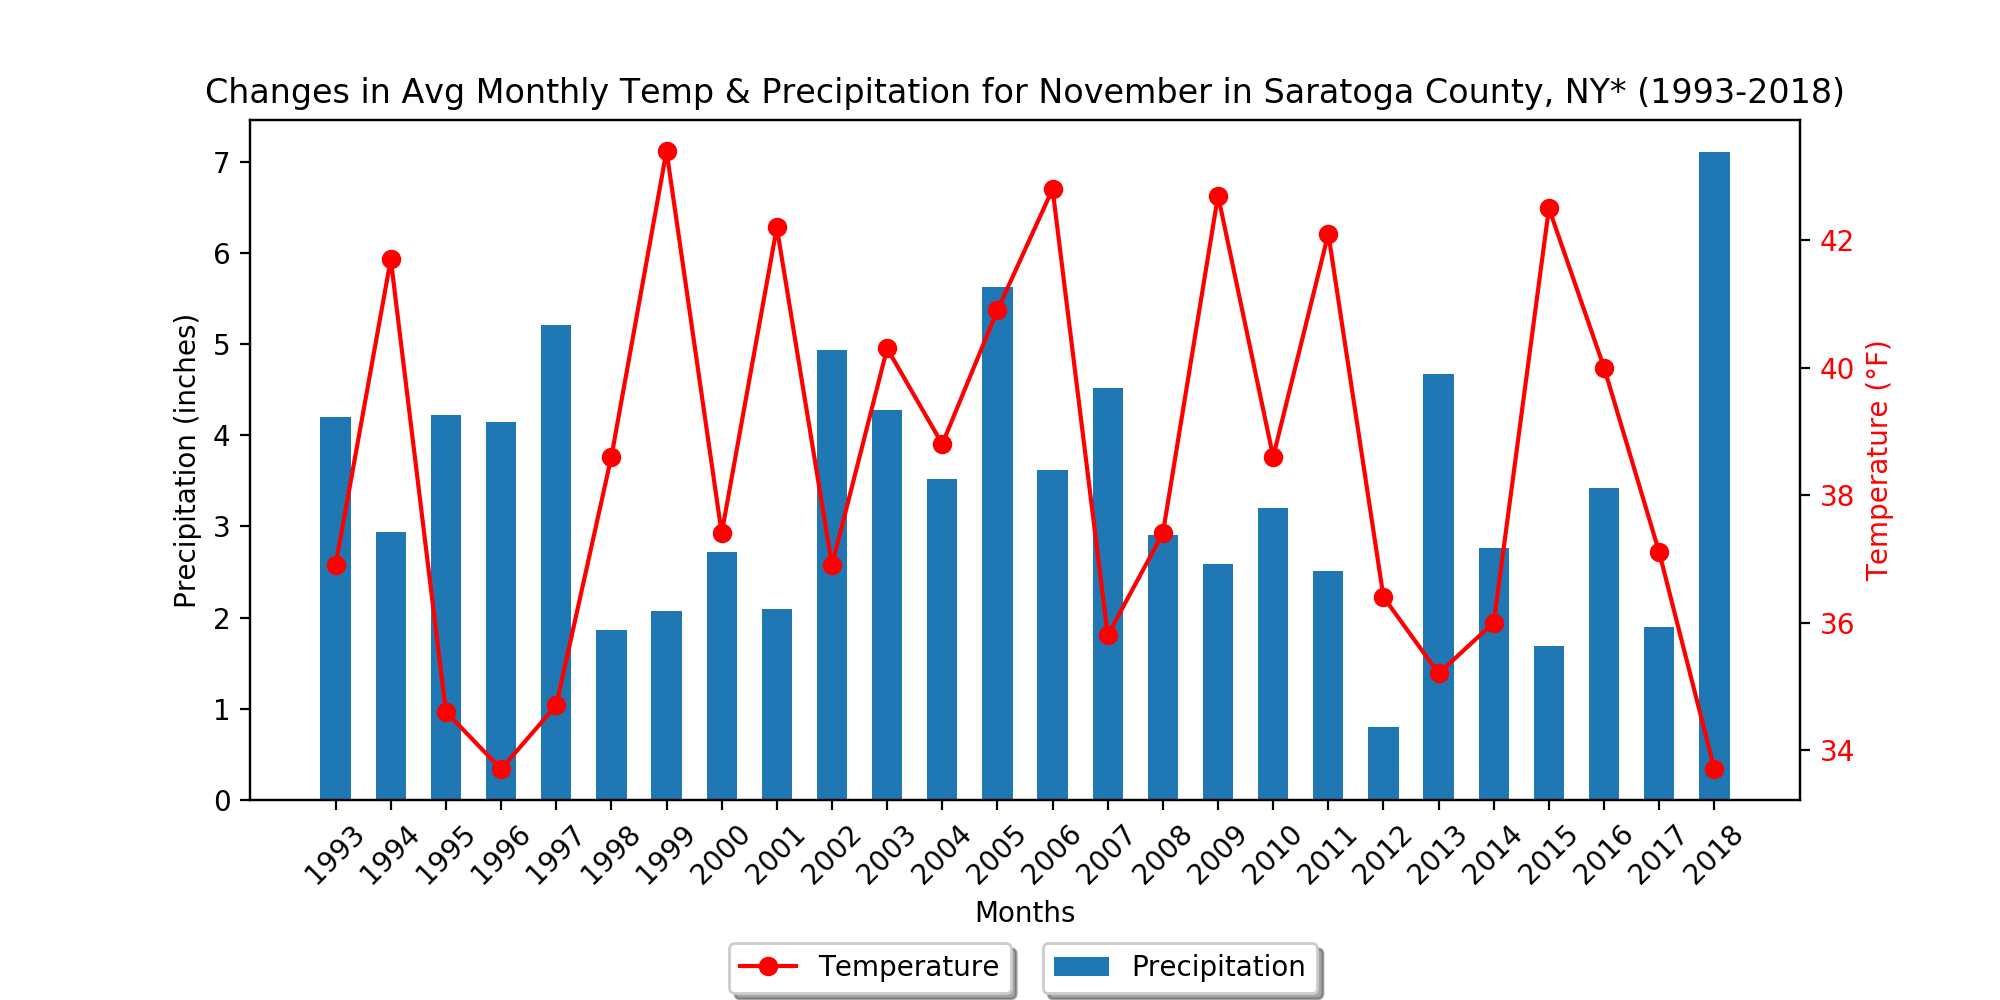

In [102]:
x=saratoga_november['Year']
y1=saratoga_november['ppt']
y2=saratoga_november['tempmeanF']

width = .55

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,width = width,label = 'Precipitation')
ax1.set_ylabel('Precipitation (inches)')
#ax1.legend(bbox_to_anchor=(.4, 0))
plt.xlabel('Months')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r',marker='o',label = 'Temperature')
ax2.set_ylabel('Temperature (°F)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
#ax2.legend(loc="upper left")
box = ax1.get_position()
box = ax2.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax1.legend(loc='upper center', bbox_to_anchor=(0.6, -0.19),
          fancybox=True, shadow=True, ncol=5)
ax2.legend(loc='upper center', bbox_to_anchor=(0.4, -0.19),
          fancybox=True, shadow=True, ncol=5)

plt.title('Changes in Avg Monthly Temp & Precipitation for November in Saratoga County, NY* (1993-2018)')
plt.subplots_adjust(bottom=.2)
plt.savefig('Avg_Temp_PPT_November_Saratoga_NY_93_18.png')


In [22]:
temp_mean_overall = []
Jan1_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='01'].tempmeanF.mean()
Feb2_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='02'].tempmeanF.mean()
Mar3_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='03'].tempmeanF.mean()
Apr4_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='04'].tempmeanF.mean()
May5_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='05'].tempmeanF.mean()
Jun6_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='06'].tempmeanF.mean()
Jul7_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='07'].tempmeanF.mean()
Aug8_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='08'].tempmeanF.mean()
Sept9_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='09'].tempmeanF.mean()
Oct_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='10'].tempmeanF.mean()
Nov_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='11'].tempmeanF.mean()
Dec_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='12'].tempmeanF.mean()

temp_mean_overall.append(Jan1_mean)
temp_mean_overall.append(Feb2_mean)
temp_mean_overall.append(Mar3_mean)
temp_mean_overall.append(Apr4_mean)
temp_mean_overall.append(May5_mean)
temp_mean_overall.append(Jun6_mean)
temp_mean_overall.append(Jul7_mean)
temp_mean_overall.append(Aug8_mean)
temp_mean_overall.append(Sept9_mean)
temp_mean_overall.append(Oct_mean)
temp_mean_overall.append(Nov_mean)
temp_mean_overall.append(Dec_mean)
temp_mean_overall
Monthslist =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
#temp_mean_overall_dict = [{'Overall Temps':temp_mean_overall,
#                           'Months':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']}]
#temp_mean_df = pd.DataFrame(temp_mean_overall_dict)
#temp_mean_df
#temp_mean_overall_dict = [{'Overall Temps':temp_mean_overall}]
#temp_mean_df = pd.DataFrame(temp_mean_overall_dict)
#temp_mean_df
df_temp=pd.DataFrame(temp_mean_overall,columns=['Overall_MeanTemp'])
df_temp['Month'] = Monthslist
#df_temp['Ppt'] = ppt_mean_overall
#df_temp=df.append({'Months':months_list}, ignore_index=True)
df_temp
#The chart is Saratoga mean temp and ppt from 1895-2017

,Overall_MeanTemp,Month
0,20.842308,Jan
1,23.169231,Feb
2,32.226923,Mar
3,45.415385,Apr
4,57.515385,May
5,65.946154,Jun
6,70.350000,Jul
7,68.684615,Aug
8,61.496154,Sept
9,49.576923,Oct


In [22]:
ppt_mean_overall = []
Jan1_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='01'].ppt.mean()
Feb2_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='02'].ppt.mean()
Mar3_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='03'].ppt.mean()
Apr4_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='04'].ppt.mean()
May5_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='05'].ppt.mean()
Jun6_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='06'].ppt.mean()
Jul7_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='07'].ppt.mean()
Aug8_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='08'].ppt.mean()
Sept9_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='09'].ppt.mean()
Oct_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='10'].ppt.mean()
Nov_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='11'].ppt.mean()
Dec_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='12'].ppt.mean()

ppt_mean_overall.append(Jan1_pptmean)
ppt_mean_overall.append(Feb2_pptmean)
ppt_mean_overall.append(Mar3_pptmean)
ppt_mean_overall.append(Apr4_pptmean)
ppt_mean_overall.append(May5_pptmean)
ppt_mean_overall.append(Jun6_pptmean)
ppt_mean_overall.append(Jul7_pptmean)
ppt_mean_overall.append(Aug8_pptmean)
ppt_mean_overall.append(Sept9_pptmean)
ppt_mean_overall.append(Oct_pptmean)
ppt_mean_overall.append(Nov_pptmean)
ppt_mean_overall.append(Dec_pptmean)
ppt_mean_overall

df_temp['Ppt'] = ppt_mean_overall
#df_temp=df.append({'Months':months_list}, ignore_index=True)
df_temp

,Overall_MeanTemp,Month,Ppt
0,20.842308,Jan,3.311538
1,23.169231,Feb,2.870385
2,32.226923,Mar,3.602692
3,45.415385,Apr,3.783462
4,57.515385,May,3.794231
5,65.946154,Jun,4.810385
6,70.350000,Jul,4.591538
7,68.684615,Aug,4.003846
8,61.496154,Sept,3.882692
9,49.576923,Oct,4.401923
